**Introduction**

This is a simple analysis of the world happiness report for two years. I prepared a code to read all the csv files located in a folder in your computer, analyze them and plot the correlation map. 

In [ ]:
import os # for reading multiple files
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb #for the correlation heatmap

# Next lines, including the first for, will open the csv files from the folder and subfolders in the same location
files = []
start_dir = r'D:\WORK\My_programs\World happiness'
pattern   = "*.csv"

In [ ]:
for dir,_,_ in os.walk(start_dir):
    files = (glob(os.path.join(dir,pattern)))   

# From each file, it is going to make the following tasks
for file in files:   

    df = pd.read_csv(file, header=0)

    #Correlation figure
    plot1 = plt.figure(1)
    plt.title('World happiness report')
    df_pearson = df.iloc[:,[2,3,4,5,6,7,8]] 
    pearsoncorr = df_pearson.corr(method='pearson')
    sb.heatmap(pearsoncorr, 
               xticklabels=pearsoncorr.columns,
               yticklabels=pearsoncorr.columns,
               annot=True,
               annot_kws={"fontsize":12},
               linewidth=0.3)

    #watermark
    plt.text(-1, -1, 'Performed by XXX',
             fontsize=20, color='gray',
             ha='center', va='center', alpha=0.8)
    #save plot
    plt.savefig(file.split('.csv')[0] + '.png', format='png', dpi=100, bbox_inches='tight')
    # deleting the next line will force plotting all files in the same figure
    plt.close('all')

**Correlation map**

This is the result for both years. As we can see, the most important things for the people to be happy are the GDP per capita (money!!, money!!) and life expectancy. Interestingly, the freedom to make choices is not so important.

For 2018:

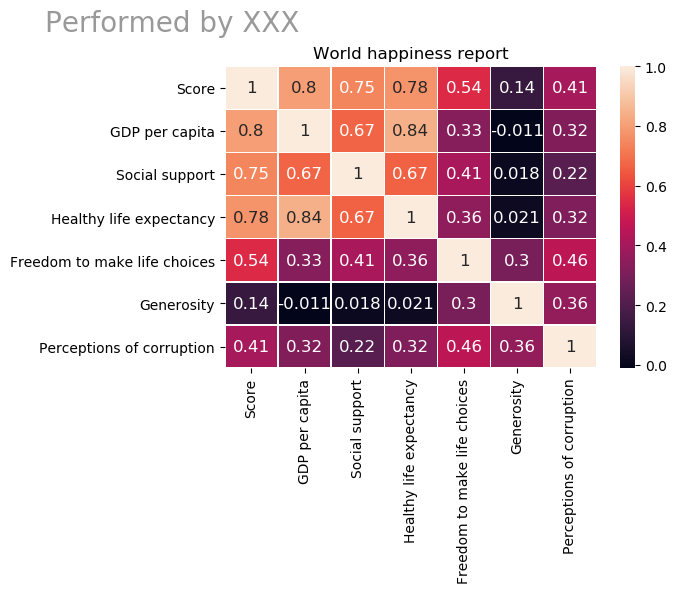

For 2019:

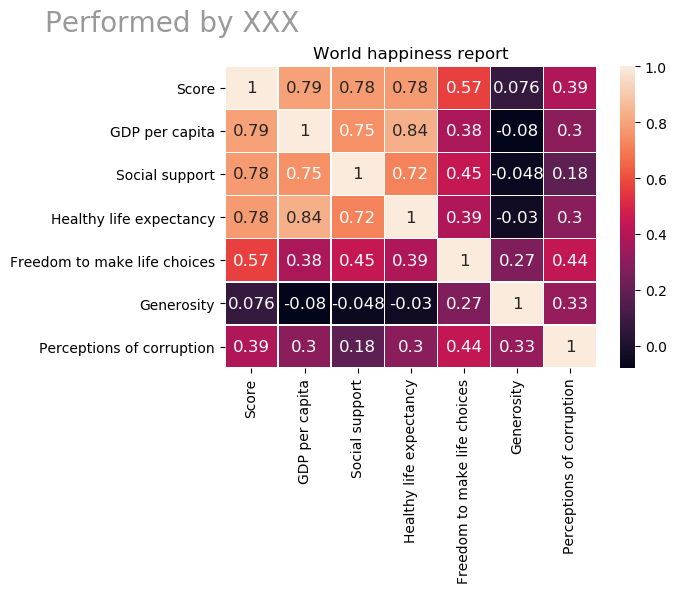

In order to visualize the happiness score in each country, I have plotted the following map. Definetely, Canada, Nordic countries and Australia are the happiest countries. :)

In [ ]:
#World map
import plotly.express as px
import pandas as pd
df = pd.read_csv('../input/world-happiness/2019.csv', header=0)

fig = px.choropleth(df, locations="Country or region",
                    color="Score", 
                    locationmode='country names',
                    color_continuous_scale='plasma',
                   )
fig.show()